<a href="https://colab.research.google.com/github/subbu521/EVA4/blob/master/S12/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')

In [0]:
import pandas as pd
import numpy as np
import math

In [0]:
import json

file = '/content/drive/My Drive/EVA/S12/Dogs_annotations.json'
annotations = json.load(open(file))

In [0]:
att = []
for r, d in annotations.items():
  for i in d['regions']:
    dic = {'filename': d['filename'] }
    dic['size'] = d['size']
    sa = i['shape_attributes']
     
    dic['x'] = sa['x']
    dic['y'] = sa['y']
    dic['h'] = sa['height']
    dic['w'] = sa['width']
    dic['image_height'] = sa['height']/sa['x']
    dic['image_width'] = sa['width']/sa['y']
    dic['log_height'] = math.log(sa['height']/sa['x'])
    dic['log_width'] = math.log(sa['width']/sa['y'])

    att.append(dic)



In [0]:
df = pd.DataFrame.from_dict(att, orient='columns')
df.head()

,filename,size,x,y,h,w,image_height,image_width,log_height,log_width
0,1.jpg,102544,169,54,944,760,5.585799,14.074074,1.720227,2.644334
1,2.jpg,129547,390,47,939,1121,2.407692,23.851064,0.878669,3.171829
2,3.jpg,81183,88,48,245,203,2.784091,4.229167,1.023921,1.442005
3,4.jpg,216565,968,151,1187,1088,1.226240,7.205298,0.203952,1.974817
4,5.jpg,376853,550,180,1120,1449,2.036364,8.050000,0.711166,2.085672


In [0]:
import matplotlib.pyplot as plt

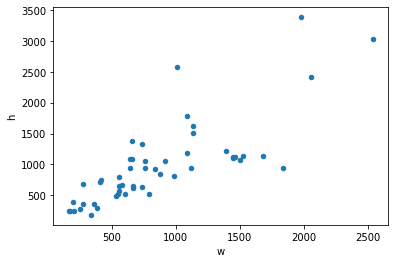

In [0]:
df.plot.scatter('w','h')

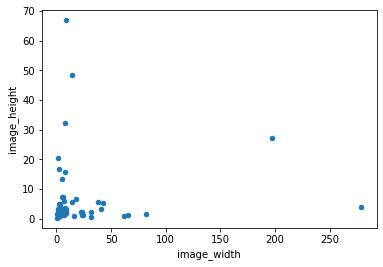

In [0]:
df.plot.scatter('image_width','image_height')

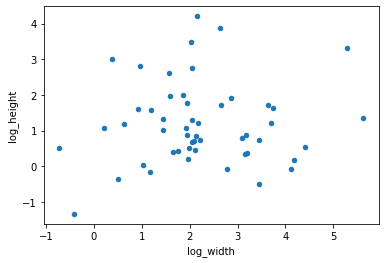

In [0]:
df.plot.scatter('log_width','log_height')

In [0]:
from sklearn.cluster import KMeans

In [0]:
X = df[['log_width', 'log_height']].to_numpy()

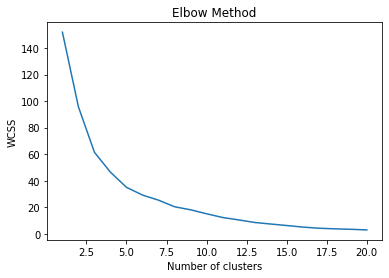

In [0]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the above plot we can understand the k = 3 is ok.
# K = 4 or 5 can also choose.
# After k = 6 also we can choose but after that the curve is a linear line

